<a href="https://colab.research.google.com/github/stanislawWojtas/Uczenie-Maszynowe/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labolatorium 4: SVM (Support Vector Machines)

### Cel/Zakres:
- Klasyfikacja SVM
- Skalowanie
- Budowanie potoków
- Regresja SVM
- Poszukiwanie wartości hiperparametrów


### Przygotowanie danych dla klasyfikacji

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [376]:
# Załadowanie zbioru danych (dane obrazów przypadków nowotwrorów piersi)
# Domyślnie load zwraca numpy jak damy as_frame = True to zwróci pandas Data Frame
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [377]:
# Drugi zbiór danych - IRIS
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Klasyfikacja


#### Zbiór z badaniem raka piersi

In [378]:
# Podział zbioru
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer['data'], data_breast_cancer['target'], test_size=0.2)
data_breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


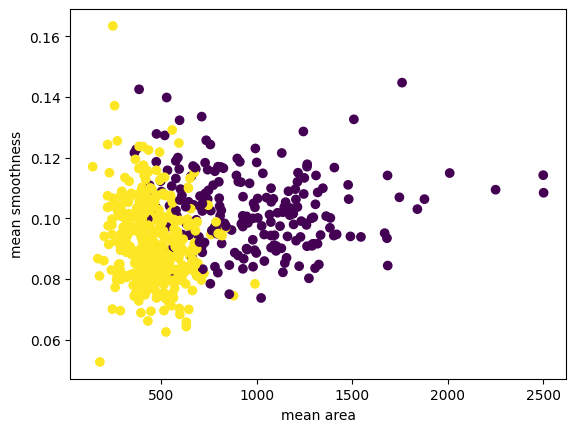

In [379]:
# Wyświetlenie naszych danych
plt.scatter(data_breast_cancer.data['mean area'], data_breast_cancer.data['mean smoothness'], c=data_breast_cancer['target'])
plt.xlabel('mean area')
plt.ylabel('mean smoothness')
plt.show()

In [380]:
# Budowa modeli klasyfikacji SVM dla średnich (mean) wartości cech area i smoothness
from sklearn.svm import LinearSVC

# hinge to szerokość "marginesu" naszego podziału
lin_svc_cancer = LinearSVC(loss='hinge')
lin_svc_cancer.fit(X_train[['mean area', 'mean smoothness']], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge')

In [381]:
# Model SVM ze skalowaniem
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Robimy to za pomocą pipeline czyli wykonujemy skalowanie i jego wynik przekazujemy do LinearSVC
lin_svc_cancer_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge')),
])

lin_svc_cancer_scaled.fit(X_train[['mean area', 'mean smoothness']], y_train)


# Policzenie accuracy dla obu modeli
train_lin_svc_cancer_acc = lin_svc_cancer.score(X_train[['mean area', 'mean smoothness']], y_train)
print(f'Accuracy (train and not scaled): {train_lin_svc_cancer_acc}')
train_lin_svc_cancer_scaled_acc = lin_svc_cancer_scaled.score(X_train[['mean area', 'mean smoothness']], y_train)
print(f'Accuracy (train and scaled): {train_lin_svc_cancer_scaled_acc}')
test_lin_svc_cancer_acc = lin_svc_cancer.score(X_test[['mean area', 'mean smoothness']], y_test)
print(f'Accuracy(test and not scaled): {test_lin_svc_cancer_acc}')
test_lin_svc_cancer_scaled_acc = lin_svc_cancer_scaled.score(X_test[['mean area', 'mean smoothness']], y_test)
print(f'Accuracy (test and scaled): {test_lin_svc_cancer_scaled_acc}')

Accuracy (train and not scaled): 0.512087912087912
Accuracy (train and scaled): 0.9076923076923077
Accuracy(test and not scaled): 0.5263157894736842
Accuracy (test and scaled): 0.8596491228070176


Widać, że accuracy dla nieprzeskalowancch danych jest niezadowalające i wynosi tylko $≈$ 60%. W przypadku danych przeskalowanych osiąga $≈$ 90%

In [382]:
# zapisanie wyników accuracy do pliku pkl
import pickle
acc_list = [train_lin_svc_cancer_acc, test_lin_svc_cancer_acc, train_lin_svc_cancer_scaled_acc, test_lin_svc_cancer_scaled_acc]
with open ('bc_acc.pkl', 'wb') as file:
  pickle.dump(acc_list, file)

Dodatkowo zwizualizujemy sobie wyniki tych modeli aby lepiej się przyglądnać jak skalowanie wpływa na dokładność (fragment wygenerowany przez AI)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


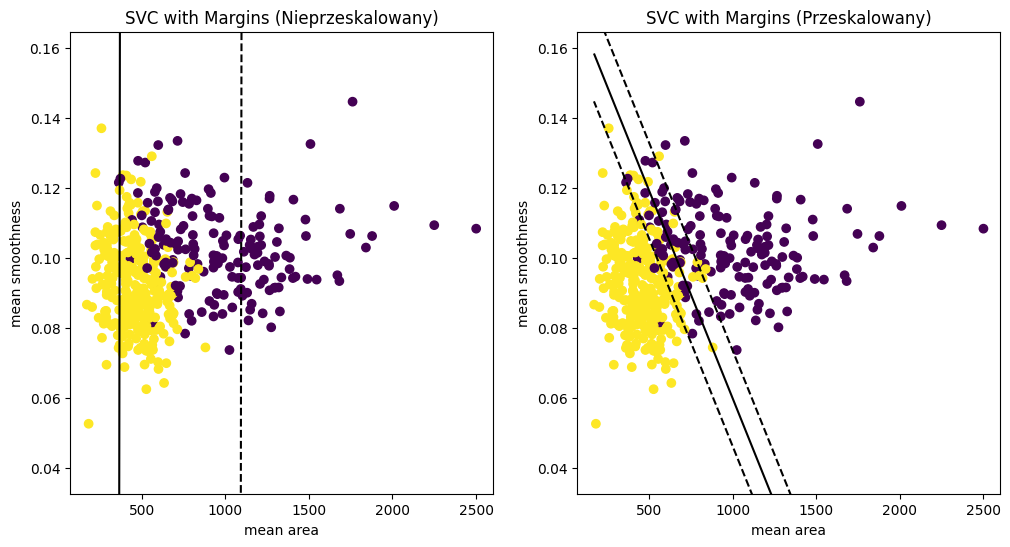

In [383]:
import numpy as np
import matplotlib.pyplot as plt

# Utwórz siatkę wykresów (1 wiersz, 2 kolumny)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Wykres 1: Nieprzeskalowany ---
# Utwórz siatkę punktów
xx, yy = np.meshgrid(np.linspace(X_train['mean area'].min() - 1, X_train['mean area'].max() + 1, 500),
                     np.linspace(X_train['mean smoothness'].min() - 1, X_train['mean smoothness'].max() + 1, 500))
# Oblicz wartości funkcji decyzyjnej
Z = lin_svc_cancer.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Narysuj linię i marginesy
axes[0].contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
# Dodaj punkty danych
axes[0].scatter(X_train['mean area'], X_train['mean smoothness'], c=y_train)
# Ustaw etykiety osi i tytuł
axes[0].set_xlabel('mean area')
axes[0].set_ylabel('mean smoothness')
axes[0].set_title('SVC with Margins (Nieprzeskalowany)')

# --- Wykres 2: Przeskalowany ---
# Utwórz siatkę punktów (taką samą jak dla pierwszego wykresu)
# Oblicz wartości funkcji decyzyjnej dla przeskalowanego modelu
Z = lin_svc_cancer_scaled.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Narysuj linię i marginesy
axes[1].contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
# Dodaj punkty danych
axes[1].scatter(X_train['mean area'], X_train['mean smoothness'], c=y_train)
# Ustaw etykiety osi i tytuł
axes[1].set_xlabel('mean area')
axes[1].set_ylabel('mean smoothness')
axes[1].set_title('SVC with Margins (Przeskalowany)')

# Ustaw zakres osi X i Y dla obu wykresów (powiększenie)
axes[0].set_xlim(X_train['mean area'].min() - 100, X_train['mean area'].max() + 100)
axes[0].set_ylim(X_train['mean smoothness'].min() - 0.02, X_train['mean smoothness'].max() + 0.02)
axes[1].set_xlim(X_train['mean area'].min() - 100, X_train['mean area'].max() + 100)
axes[1].set_ylim(X_train['mean smoothness'].min() - 0.02, X_train['mean smoothness'].max() + 0.02)

# Wyświetl wykresy
plt.show()

#### SVC dla zbioru Iris
Zostanie stworzony model wykrywający czy dany przypadek jest gatunku *Virginica* na podstawie cech: długość i szerokość płatka

In [384]:
# stworzenie nowego dataframe i przekształcenie ostatniej kolumny z 3 opcji na dwie (jest albo nie jest Virginica)
df_iris = data_iris.data[['petal length (cm)', 'petal width (cm)']]
df_iris['target'] = data_iris['target']
df_iris['target'] = np.where(df_iris['target'] == 2, 1, 0)
df_iris

<ipython-input-384-dc6b11a84df0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris['target'] = data_iris['target']
<ipython-input-384-dc6b11a84df0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris['target'] = np.where(df_iris['target'] == 2, 1, 0)


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [385]:
# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(df_iris[['petal length (cm)', 'petal width (cm)']], df_iris['target'], test_size=0.2)
X_train

,petal length (cm),petal width (cm)
142,5.1,1.9
32,1.5,0.1
98,3.0,1.1
36,1.3,0.2
10,1.5,0.2
...,...,...
73,4.7,1.2
23,1.7,0.5
0,1.4,0.2
106,4.5,1.7


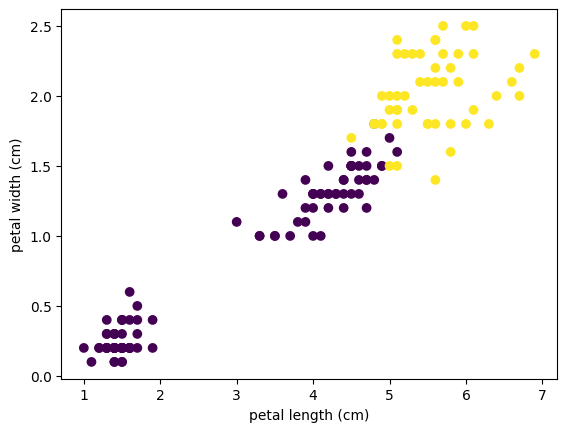

In [386]:
# wizualizacja tego zbiou
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [387]:
lin_svc_iris = LinearSVC(loss='hinge')
lin_svc_iris.fit(X_train, y_train)

train_lin_svc_iris_acc = lin_svc_iris.score(X_train, y_train)
print("Train not scaled acc: ", train_lin_svc_iris_acc)
test_lin_svc_iris_acc = lin_svc_iris.score(X_test, y_test)
print("Test not scaled acc: ", test_lin_svc_iris_acc)

Train not scaled acc:  0.9583333333333334
Test not scaled acc:  0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [388]:
# SVC with scaled data

lin_svc_iris_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge')),
])
lin_svc_iris_scaled.fit(X_train, y_train)

train_lin_svc_iris_scaled_acc = lin_svc_iris_scaled.score(X_train, y_train)
print("Train scaled acc: ", train_lin_svc_iris_scaled_acc)
test_lin_svc_iris_scaled_acc = lin_svc_iris_scaled.score(X_test, y_test)
print("Test scaled acc: ", test_lin_svc_iris_scaled_acc)

Train scaled acc:  0.95
Test scaled acc:  0.9666666666666667


In [389]:
acc_list = [train_lin_svc_iris_acc, test_lin_svc_iris_acc, train_lin_svc_iris_scaled_acc, test_lin_svc_iris_scaled_acc]
with open('iris_acc.pkl', 'wb') as file:
  pickle.dump(acc_list, file)

W przypadku dataset Iris skalowanie danych nie zmieniło accuracy. Może to być spowodowane faktewm, że te dane są już dobrze rozdzielone i wyskalowane.

### Przygotowanie danych dla regresji

<Axes: xlabel='x', ylabel='y'>

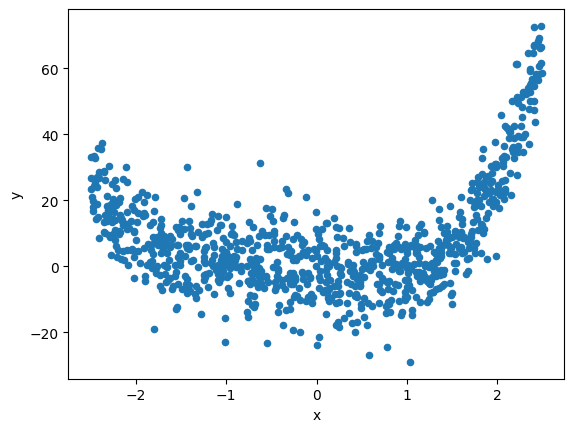

In [390]:
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x', y='y')

In [391]:
# podział zbioru na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2)

### Regresja

In [392]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures

# stworzenie strumienia rozszerzającego cechy do 4 wymiarów oraz regresora SVR
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('svr', LinearSVR())
])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('scaler', StandardScaler()), ('svr', LinearSVR())])

In [393]:
# obliczneie MSE dla treningowego i testowego
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, model.predict(X_train))
print("Train MSE: ", train_mse)
test_mse = mean_squared_error(y_test, model.predict(X_test))
print("Test MSE: ", test_mse)

Train MSE:  62.47372912278976
Test MSE:  78.59367814600868


Teraz powtórzmy to na tych samych danych tylko użyjemy SVR z kernel poly 4 stopnia a nie LinearSVR

In [394]:
# SVR regression
from sklearn.svm import SVR

model_2 = SVR(kernel='poly', degree=4)
model_2.fit(X_train, y_train)
train_mse_2 = mean_squared_error(y_train, model_2.predict(X_train))
print("Train MSE: ", train_mse_2)
test_mse_2 = mean_squared_error(y_test, model_2.predict(X_test))
print("Test MSE: ", test_mse_2)

Train MSE:  108.70730768959899
Test MSE:  127.54395665149151


Widać że wyniki są zdecydowanie większe co nas nie zadowala

In [395]:
# Użycie GridSearchCV do znalezienia najlepszych parametrów do SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1, 1, 10],
    'coef0' : [0.1, 1, 10]
}
search = GridSearchCV(SVR(kernel='poly', degree=4), param_grid, scoring='neg_mean_squared_error')
search.fit(X.reshape(-1, 1), y)
c = search.best_params_['C']
coef0 = search.best_params_['coef0']
print(f'Best C: {c}')
print(f'Best coef0: {coef0}')

Best C: 10
Best coef0: 10


In [396]:
# wyliczenie mse dla otrzymanych najlepszych hiperparametrów
model_3 = SVR(kernel='poly', degree=4, C=c, coef0=coef0)
model_3.fit(X_train, y_train)
train_mse_3 = mean_squared_error(y_train, model_3.predict(X_train))
print("Train MSE: ", train_mse_3)
test_mse_3 = mean_squared_error(y_test, model_3.predict(X_test))
print("Test MSE: ", test_mse_3)

Train MSE:  61.749704496695095
Test MSE:  78.18605759817495


Widać, że wyniki są podobne jak w LinearSVR

In [397]:
# zapisanie wyników do pliku pkl
mse_list = [train_mse, test_mse, train_mse_3, test_mse_3]

with open('reg_mse.pkl', 'wb') as file:
  pickle.dump(mse_list, file)
mse_list

[62.47372912278976, 78.59367814600868, 61.749704496695095, 78.18605759817495]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


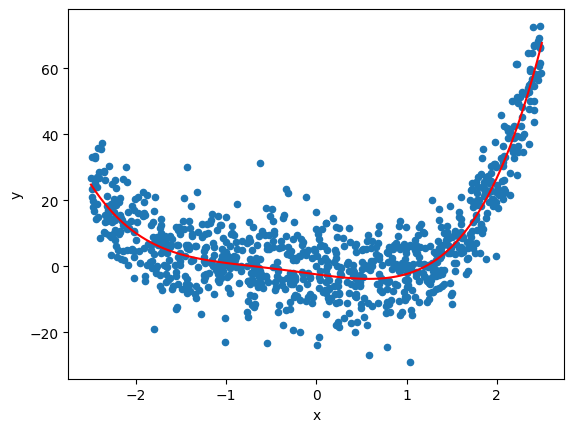

In [399]:
# wynik regresji
x = np.linspace(-2.5, 2.5, 100)
y_pred = model_3.predict(x.reshape(-1, 1))
df.plot.scatter(x='x', y='y')
plt.plot(x, y_pred, 'r')
plt.show()